In [1]:
!pip install -Uqq fastai

In [2]:
path = ('yes_or_no')

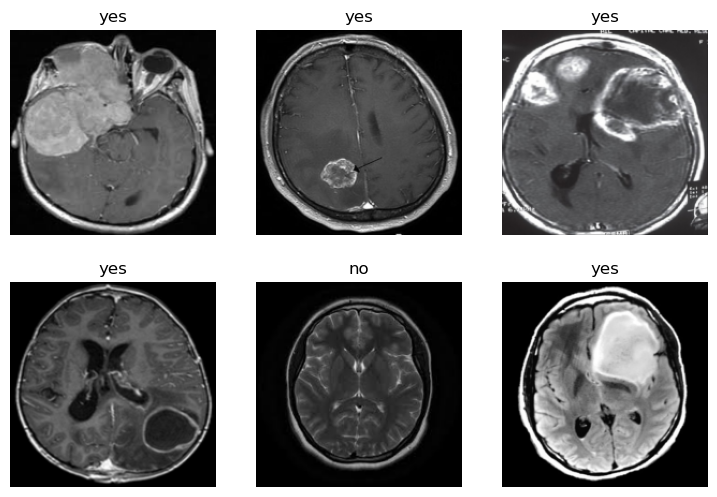

In [12]:
from fastai.data.all import *
from fastai.vision.all import *
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.350282,0.996865,0.440000,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.624928,0.877900,0.380000,00:08
1,0.474706,0.837302,0.320000,00:08


In [10]:
img = Image.open('test2.jpeg')
img.to_thumb(256,256)
is_tumor,_,probs = learn.predict(img)
print(f"Brain Tumor: {is_tumor}")
print(f"Probability of a Tumor: {(1-probs[0])*100}%")

Brain Tumor: no
Probability of a Tumor: 18.045955657958984%


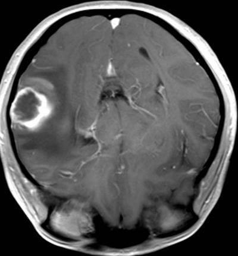

In [6]:
im = Image.open('test2.jpeg')
im.to_thumb(256,256)

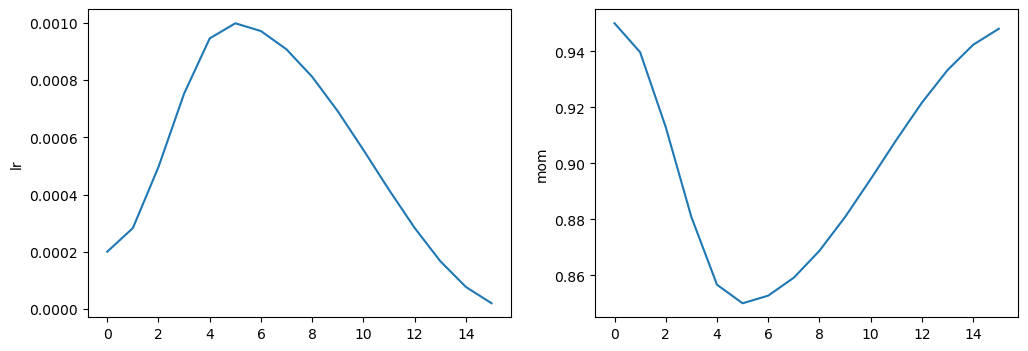

In [11]:
learn.recorder.plot_sched()